# Usage Guide for White Noise Process Study

## Introduction
This notebook provides a step-by-step guide on how to use the code provided in this repository for studying the White Noise Process. We will cover the following topics:
1. Setting up the environment
2. Loading the data
3. Running the analysis
4. Interpreting the results


## 1. Setting Up the Environment
First, ensure you have all the necessary libraries installed. You can install the required dependencies by running:

In [ ]:
%pip install numpy pandas matplotlib scipy statsmodels

## 2. Loading the Data
Next, we will load the data used in the analysis. The data should be placed in the `data` directory. For this example, we'll assume the data is in a CSV file named `white_noise_data.csv`.

In [ ]:
import pandas as pd

# Load the data
data = pd.read_csv('data/white_noise_data.csv')
data.head()

,WhiteNoise
0,0.496714
1,-0.138264
2,0.647689
3,1.523030
4,-0.234153


## 3. Running the Analysis
Now, we'll demonstrate how to run the analysis. This includes generating white noise, fitting an ARIMA model, and visualizing the results.

### 3.1 Generating White Noise
We'll start by generating a white noise process.

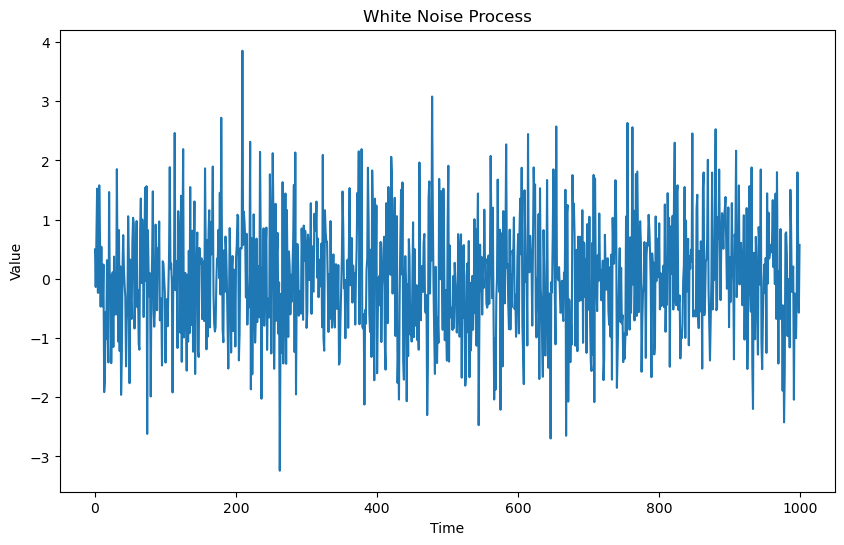

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate white noise
np.random.seed(42)
white_noise = np.random.normal(0, 1, 1000)

# Plot the white noise
plt.figure(figsize=(10, 6))
plt.plot(white_noise)
plt.title('White Noise Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

### 3.2 Fitting an ARIMA Model
Next, we'll fit an ARIMA model to the white noise data.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model
model = ARIMA(white_noise, order=(0, 0, 0))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 0)   Log Likelihood               -1405.230
Date:                Tue, 30 Jul 2024   AIC                           2814.459
Time:                        12:45:53   BIC                           2824.844
Sample:                             0   HQIC                          2818.667
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          0.0199      0.032      0.625      0.532      -0.043       0.082
sigma2         0.9574      0.043     22.303      0.000       0.873       1.042
Ljung-Box (L1) (Q):                   0.04   Jarque

### 3.3 Visualizing the Results
Finally, we'll visualize the residuals of the ARIMA model to confirm the white noise property.

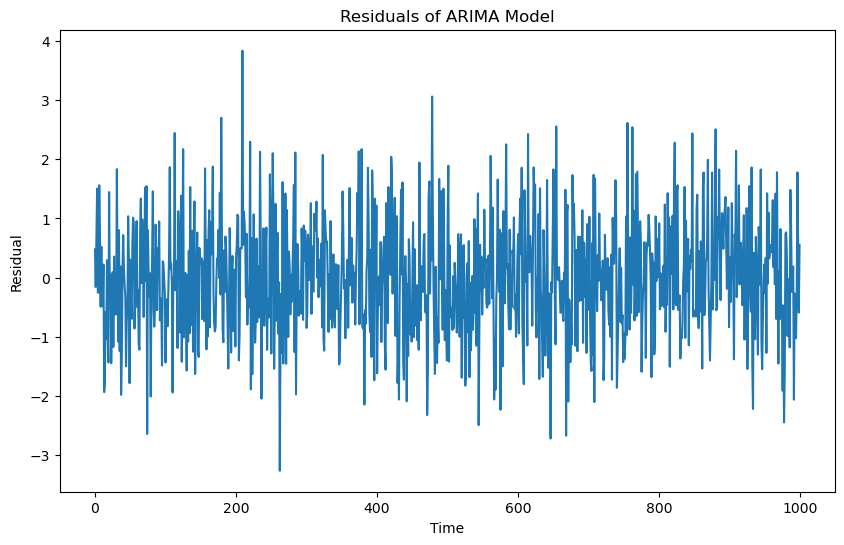

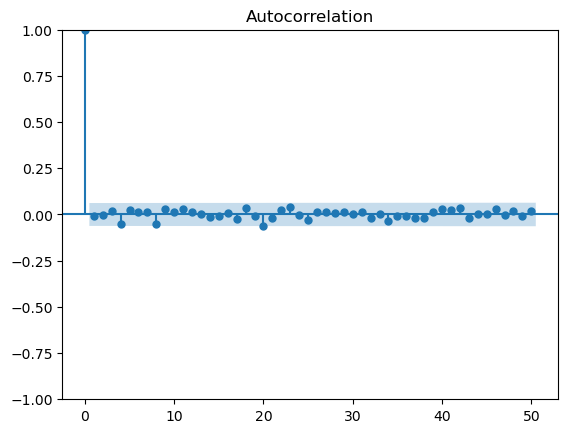

In [5]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Plot residuals
residuals = model_fit.resid

plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.show()

# Plot ACF of the residuals
plot_acf(residuals, lags=50)
plt.show()


## 4. Interpreting the Results
The residuals of the ARIMA model should resemble white noise if the original data is indeed a white noise process. The ACF plot should show near-zero autocorrelations for all lags.

- **White Noise Process Plot**: Shows the randomness of the white noise process.
- **ARIMA Model Summary**: Provides details about the fitted ARIMA model.
- **Residuals Plot**: Helps verify if the residuals resemble white noise.
- **ACF Plot**: Confirms the lack of autocorrelation in the residuals.

This concludes the usage guide for the White Noise Process study. For more detailed analysis, refer to the other notebooks in this repository.